<a href="https://colab.research.google.com/github/JagtapT/Deep-Learning-6th-July/blob/main/RegressionKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the dataset

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Basic data qaulity checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.duplicated().sum()

41

In [ ]:
df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


## Separate X and Y (PE)

In [ ]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


## Preprocess X data using pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


## Apply train test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [ ]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [ ]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [ ]:
xtrain.shape

(7654, 4)

In [ ]:
xtest.shape

(1914, 4)

Build the neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:
# Initialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add dense hidden layer 1
model.add(Dense(16, activation='relu'))

# Add dense hidden layer 2
model.add(Dense(8, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='linear'))

In [ ]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [ ]:
hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=60)

Epoch 1/60
240/240 [==============================] - 4s 4ms/step - loss: 199813.0156 - mae: 446.6179 - val_loss: 185775.1094 - val_mae: 430.5755
Epoch 2/60
240/240 [==============================] - 1s 5ms/step - loss: 146559.1094 - mae: 379.3572 - val_loss: 96381.7266 - val_mae: 305.1739
Epoch 3/60
240/240 [==============================] - 1s 6ms/step - loss: 53980.1289 - mae: 211.0459 - val_loss: 27503.6680 - val_mae: 140.6344
Epoch 4/60
240/240 [==============================] - 1s 4ms/step - loss: 21738.6680 - mae: 123.7822 - val_loss: 17675.7090 - val_mae: 111.1243
Epoch 5/60
240/240 [==============================] - 1s 4ms/step - loss: 15293.6670 - mae: 103.7223 - val_loss: 12182.5664 - val_mae: 92.5285
Epoch 6/60
240/240 [==============================] - 1s 3ms/step - loss: 10091.7891 - mae: 84.6385 - val_loss: 7526.2954 - val_mae: 73.2825
Epoch 7/60
240/240 [==============================] - 1s 4ms/step - loss: 6019.0439 - mae: 65.5932 - val_loss: 4360.1484 - val_mae: 55.71

In [ ]:
hist.history["loss"]

[199813.015625,
 146559.109375,
 53980.12890625,
 21738.66796875,
 15293.6669921875,
 10091.7890625,
 6019.0439453125,
 3465.737548828125,
 2004.1982421875,
 1170.4833984375,
 694.914794921875,
 424.91802978515625,
 270.8105163574219,
 181.6057891845703,
 127.1537857055664,
 94.6280746459961,
 73.69135284423828,
 60.16811752319336,
 50.88452911376953,
 44.197906494140625,
 39.20249557495117,
 35.29429626464844,
 32.20611572265625,
 29.846445083618164,
 27.896251678466797,
 26.425521850585938,
 25.193256378173828,
 24.25022315979004,
 23.33270263671875,
 22.705677032470703,
 22.218151092529297,
 21.880611419677734,
 21.512548446655273,
 21.35262680053711,
 21.07624053955078,
 20.980073928833008,
 20.690509796142578,
 20.76515769958496,
 20.72723960876465,
 20.702653884887695,
 20.558090209960938,
 20.425390243530273,
 20.378978729248047,
 20.41692543029785,
 20.224672317504883,
 20.382963180541992,
 20.161705017089844,
 20.195985794067383,
 20.18727684020996,
 20.149044036865234,
 20.13

In [ ]:
hist.history["val_loss"]

[185775.109375,
 96381.7265625,
 27503.66796875,
 17675.708984375,
 12182.56640625,
 7526.29541015625,
 4360.1484375,
 2516.73974609375,
 1457.7142333984375,
 859.2249145507812,
 519.791748046875,
 325.3364562988281,
 211.8878936767578,
 145.15525817871094,
 105.37353515625,
 81.0798110961914,
 65.59081268310547,
 54.90217590332031,
 47.102073669433594,
 41.91501235961914,
 37.23393249511719,
 34.20232391357422,
 31.35601806640625,
 29.074710845947266,
 26.837753295898438,
 25.630924224853516,
 24.83182144165039,
 23.763864517211914,
 22.522397994995117,
 21.673009872436523,
 20.79197883605957,
 20.815393447875977,
 20.036226272583008,
 20.582550048828125,
 19.807144165039062,
 19.307519912719727,
 19.42487335205078,
 19.33938217163086,
 19.53943634033203,
 19.779155731201172,
 18.79515266418457,
 19.521024703979492,
 18.247909545898438,
 18.35444450378418,
 18.751541137695312,
 18.760278701782227,
 18.985271453857422,
 18.244415283203125,
 18.073545455932617,
 19.667238235473633,
 19.

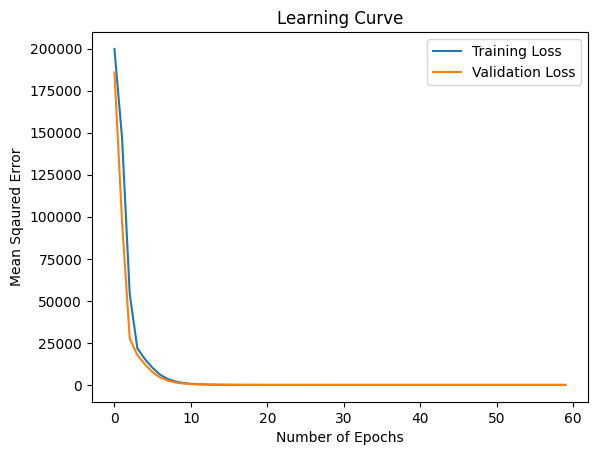

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Sqaured Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 2ms/step - loss: 20.6081 - mae: 3.6061


[20.608062744140625, 3.606081485748291]

In [ ]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.2036 - mae: 3.4962


[19.20357322692871, 3.496210813522339]

### Predict the results for train and test data

In [ ]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [ ]:
ypred_train[0:5]

array([[442.02863],
       [434.5763 ],
       [433.54358],
       [434.0694 ],
       [434.02545]], dtype=float32)

In [ ]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [ ]:
ypred_test[0:5]

array([[436.4027 ],
       [436.61597],
       [461.42133],
       [475.4214 ],
       [436.45264]], dtype=float32)

In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


In [ ]:
# R2 score for train data
from sklearn.metrics import r2_score
r2_score(ytrain,ypred_train)

0.9295503889120563

In [ ]:
# R2 score in test data

r2_score(ytest, ypred_test)

0.9328884606005267

### We can use this model for out of sample prediction as the r2 score is greater than 0.8 for both train and test data

In [ ]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380936,0.355246,-0.594274,0.813796
1,1.238415,0.045974,-1.027045,-1.829444
2,1.105566,1.487673,-2.010463,0.861058
3,0.810346,0.625958,-0.316424,0.052812
4,-1.005253,-1.062057,2.110125,-0.160209


In [ ]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 2ms/step


array([[444.86572],
       [440.82043],
       [432.93762],
       [439.97656],
       [473.4864 ]], dtype=float32)

In [41]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [42]:
xnew["PowerOutput_pred"] = preds
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,444.865723
1,28.88,54.89,1007.16,46.60,440.820435
2,27.89,73.21,1001.32,85.88,432.937622
3,25.69,62.26,1011.38,74.08,439.976562
4,12.16,40.81,1025.79,70.97,473.486389
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.252991
96,11.78,39.96,1011.37,82.95,471.250183
97,5.62,41.38,1020.91,86.21,482.760254
98,24.96,74.99,1008.25,80.52,436.505249


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

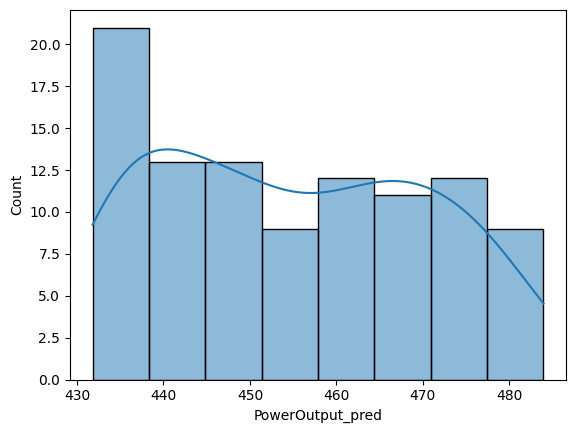

In [45]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [46]:
xnew.to_csv("Results.csv", index= False)